# 1. Linear Regression

## 1.1. The equations

### 1.1.1. Linear Regression model prediction

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$

Linear regression tries to find the best-fitting line (or hyperplane in higher dimensions) that minimizes the difference between the actual values of $y$ and the predicted values $\hat{y}$.

The coefficients ($\theta_1, \theta_2, ..., \theta_n$) are determined through a process called **least squares**, which minimizes the sum of the squared differences between the actual and predicted values.

- $\hat{y}$: predicted value of the dependent variable - it's an estimate of the actual value of $y$
- $n$: number of features
- $\theta_0$: intercept term, which represents the value of $\hat{y}$ when all the independent variables are equal to zero - it's a constant term
- $\theta_1, \theta_2, ..., \theta_n$: coefficients of the independent variables.
  - Each $\theta_i$ represents the contribution of the corresponding independent variable $x_i$ to the prediction
  - They are also known as regression coefficients or weights
- $x_1, x_2, ..., x_n$: independent variables or predictors - input features used to predict the value of $\hat{y}$.

### 1.1.2. Linear Regression model prediction (vectorized form)

$\hat{y} = h_\theta(x) = \theta \cdot x$

The vectorized form is efficient for computation and can be easily implemented in matrix algebra.

It allows for batch processing of multiple predictions at once, which is especially useful when working with large datasets.

- $h_\theta(x)$: hypothesis function, which makes predictions based on the input features $x$ and the model parameters $\theta$
- $\theta$: vector of model parameters (coefficients), including the intercept term $\theta_0$
- The dot product $\theta \cdot x$ represents the sum of the element-wise products of the parameter vector $\theta$ and the input feature vector $x$

### 1.1.3. MSE cost function for a Linear Regression model

$MSE(X,h_\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( \theta^\intercal x^{(i)} - y^{(i)} \right)^2$

- $MSE(X,h_\theta)$: Mean Squared Error for the dataset $X$ using the hypothesis $h_\theta$
- $m$: number of training examples in the dataset.
- $\theta^\intercal$: transpose of the parameter vector $\theta$ - it gives the predicted value for the $i$-th example when multiplied with the feature vector $x^{(i)}$
- $x^{(i)}$: feature vector of the $i$-th training example
- $y^{(i)}$: actual target value for the the $i$-th training example
- $\sum_{i=1}^{m}$: summation over all $m$ training examples

> The $^⊺$ symbol denotes the transpose of a vector or matrix in mathematical notation:
>
> For a vector:
> - If you have a column vector $v$ of dimensions $n \times 1$, its transpose $v^\intercal$ will be a row vector of dimensions $1 \times n$
>
> For a matrix:
> - If you have a matrix $A$  with dimensions $m \times n$, its transpose $A^\intercal$ will be a matrix of dimensions $n \times m$. This operation essentially "flips" the matrix over its diagonal, turning rows into columns and vice versa.

In essence, for each training example, you:

1. Compute the predicted value using the linear combination of features and parameters, $\theta^\intercal x^{(i)}$
2. Subtract the actual target value $y^{(i)}$ from the predicted value to get the prediction error
3. Square the prediction error to ensure it's non-negative and to penalize larger errors more heavily
4. Sum the squared errors for all training examples
5. Divide the total by the number of training examples $m$ to get the average squared error

The resulting value is the Mean Squared Error, which gives an overall sense of how well the model's predictions align with the actual data. A lower MSE indicates better model performance.

### 1.1.4. The Normal Equation

The normal equation provides a way to find the values of $\theta$ that minimize the Mean Squared Error (MSE) between the predicted and actual values in a linear regression model

$\hat{\theta} = (X^\intercal X)^{-1} X^\intercal y$

- $\hat{\theta}$: value of $\theta$ that minimizes the cost function
- $X$: matrix of input features (with each row being a training example and each column being a feature)
- $X^\intercal$: transpose of the matrix $X$
- $y$: vector of target values (actual output values) containing $y^{(1)}$ to $y^{(m)}$
- $(X^\intercal X)^{-1}$: inverse of the matrix product $X^\intercal X$

## 1.2. Implementation

### 1.2.1. Generating some data points to work with

In [1]:
import random

rng_state=random.randint(0, 2**32 - 1)
rng_state

69933969

In [2]:
import numpy as np

np.random.seed(rng_state)
m = 100  # number of instances
X = 2 * np.random.rand(m, 1)  # column vector
y = 4 + 3 * X + np.random.randn(m, 1)  # column vector

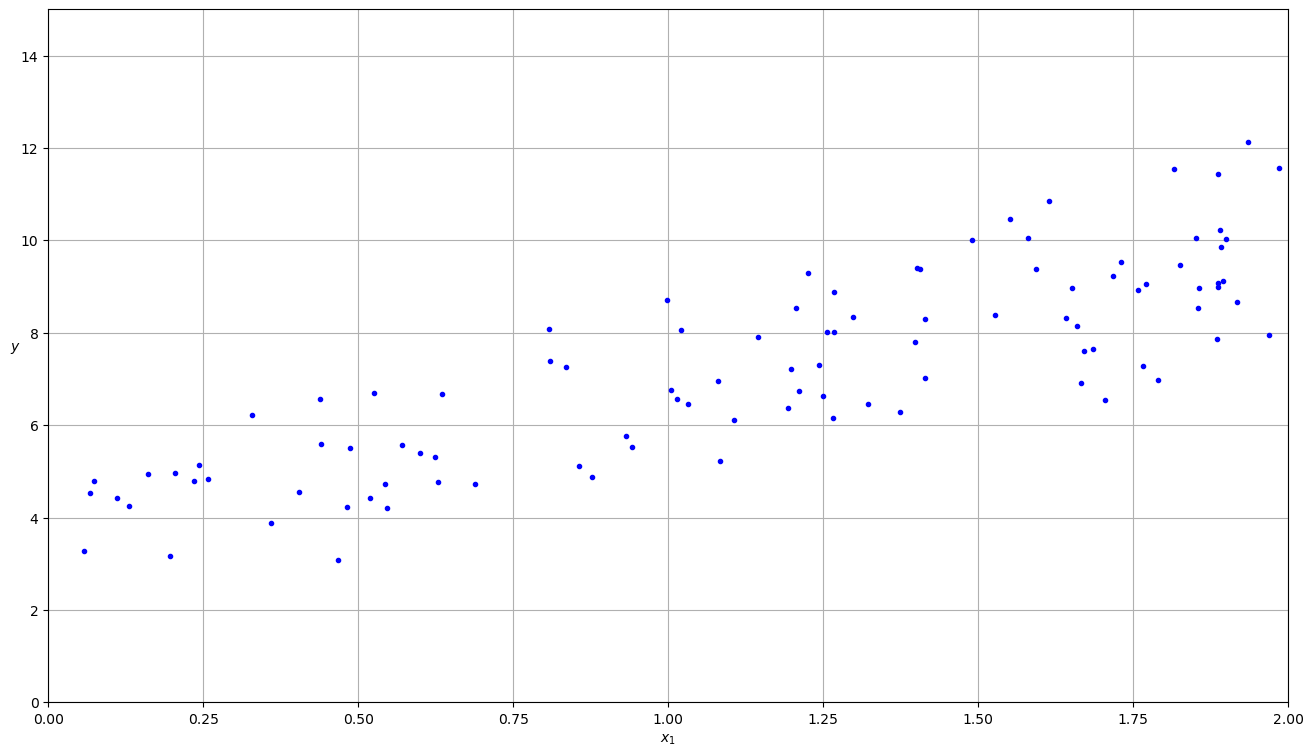

In [3]:
import matplotlib.pyplot as plt

plt.figure(figsize=(16, 9))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

### 1.2.2. Compute $\hat{\theta}$ using the normal equation

- `inv()` function from NumPy's linear algebra module (`np.linalg`) to compute the inverse of a matrix
- `dot()` method for matrix multiplication

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)  # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y

Note:
- The `@` operator performs matrix multiplication
- If `A` and `B` are NumPy arrays, then `A @ B` is equivalent to `np.matmul(A, B)`
- Many other libraries, like TensorFlow, PyTorch, and JAX, support the `@` operator, but `@` cannot be used on pure Python arrays (i.e. lists of lists)

The function used to generate the data points is $y = 4 + 3 x_1 + \text{Gaussian noise}$

The $\theta_0$ and $\theta_1$ values found by `np.linalg.inv()` are:

In [5]:
theta_best

array([[3.7764576 ],
       [3.01336054]])

### 1.2.3. Making predictions with $\hat{\theta}$

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)  # add x0 = 1 to each instance
y_predict = X_new_b @ theta_best
y_predict

array([[3.7764576 ],
       [9.80317867]])

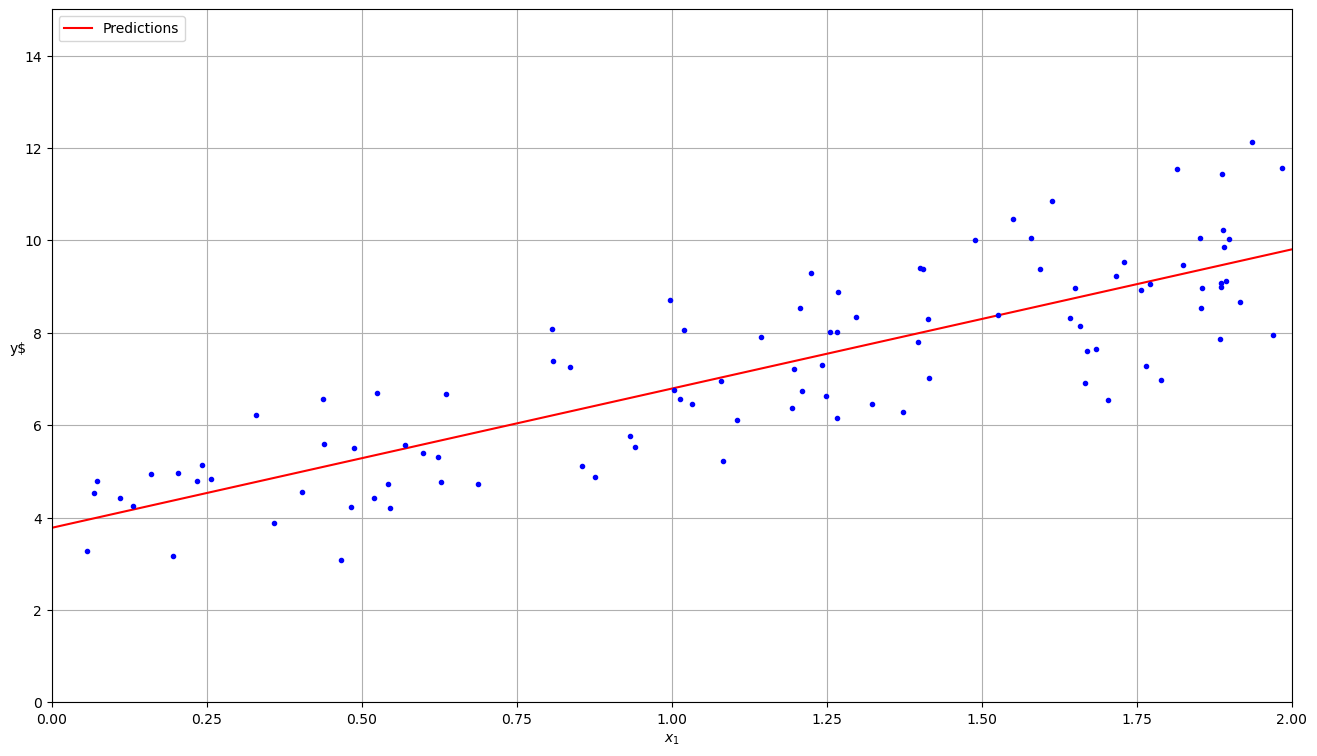

In [7]:
plt.figure(figsize=(16, 9))
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()
plt.legend(loc='upper left')

### 1.2.4. Performing linear regression using Scikit-Learn

In [8]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.7764576]), array([[3.01336054]]))

In [9]:
lin_reg.predict(X_new)

array([[3.7764576 ],
       [9.80317867]])

The `LinearRegression` class is based on the `scipy.linalg.lstsq()` (least squares) function which can be called directly:

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[3.7764576 ],
       [3.01336054]])

This function computes $X^+y$, where  is the pseudoinverse of $X$ (specifically the Moore-Penrose inverse)

`np.linalg.pinv()` can be used to compute the pseudoinverse directly:

In [11]:
np.linalg.pinv(X_b) @ y

array([[3.7764576 ],
       [3.01336054]])

# 2. Gradient Descent

## 2.1. Batch Gradient Descent

### 2.1.1. Partial derivatives of the cost function

The equation:

$\frac{\partial}{\partial \theta_j} MSE(\theta) = \frac{2}{m} \sum_{i=1}^{m} \left( \theta^\intercal x^{(i)} - y^{(i)} \right) x_j^{(i)}$

computes the partial derivative of the MSE with regards to parameter $\theta_j$

- $MSE(\theta)$: cost function
- $\theta$: parameters of the model
- $x^{(i)}$: feature vector for the $i$-th training example
- $y^{(i)}$: actual output value for the $i$-th training example
- $m$: number of training examples

### 2.1.2. Gradient vector of the cost function

Instead of computing these partial derivatives individually for each $\theta_j$, the gradient vector $\nabla_\theta MSE(\theta)$ combines all the partial derivatives of the cost function (one for each model parameter) into a single vector:

$
\nabla_\theta MSE(\theta) = \left(
\begin{matrix}
\frac{\partial}{\partial \theta_0} MSE(\theta) \\
\frac{\partial}{\partial \theta_1} MSE(\theta) \\
\vdots \\
\frac{\partial}{\partial \theta_n} MSE(\theta)
\end{matrix}
\right) = \frac{2}{m} X^\intercal (X \theta - y)
$

- $X$: matrix of input features, where each row is a training example and each column is a feature
- $X^\intercal$: transpose of the matrix $X$
- $y$: vector of actual output values
- $X \theta$: predicted output values based on the current parameters $\theta$

### 2.1.3. Gradient descent step

The equation:

$\theta^{(\text{next step})} = \theta - \eta \nabla_\theta MSE(\theta)$

represents the update rule for gradient descent. In each iteration, the parameters $\theta$ are adjusted in the direction that reduces the cost function the most

- $\eta$ (eta): learning rate, which controls the size of the step taken in the direction of the gradient
- $\theta^{(\text{next step})}$: updated parameter vector

This process is repeated iteratively until the parameters $\theta$ converge to the values that minimize the cost function

Note:
- This algorithm is called *batch gradient descent* because it uses the whole batch of training set $X$ at every step
- It is terribly slow on very large training set; there are faster gradient descent algorithms in sections below
- However, gradient descent scales well with the number of features; training a linear regression model when there are hundreds of thousands of features is much faster using gradient descent than using the Normal equation or SVD decomposition

### 2.1.4. Implementation

In [12]:
eta = 0.1  # learning rate
n_epochs = 1000
m = len(X_b)  # number of instances

np.random.seed(rng_state)
theta = np.random.randn(2, 1)  # randomly initialized model parameters

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

The trained model parameters:

In [13]:
theta

array([[3.7764576 ],
       [3.01336054]])

#### Visualizing different learning rates $\eta$

Define the `plot_gradient_descent()` function to plot the diagram with up to 20 iterations shown:

In [14]:
import matplotlib as mpl

def plot_gradient_descent(theta, eta):
  m = len(X_b)
  plt.plot(X, y, 'b.')
  n_epochs = 1000
  n_shown = 20
  theta_path = []
  for epoch in range(n_epochs):
    if epoch < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(epoch / n_shown + 0.15))
      plt.plot(X_new, y_predict, linestyle='solid', color=color)
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients
    theta_path.append(theta)
  plt.xlabel('$x_1$')
  plt.axis([0, 2, 0, 15])
  plt.grid()
  plt.title(fr'$\eta = {eta}$')
  return theta_path

Plotting different $\eta$ values:
- Left: learning rate is too low - the algorithm will eventually reach the solution, but it will take a long time
- Middle: learning rate looks pretty good - in just a few epochs, it has already converged to the solution
- Right: learning rate is too high - the algorithm diverges, jumping all over the place and actually getting further and further away from the solution at every step

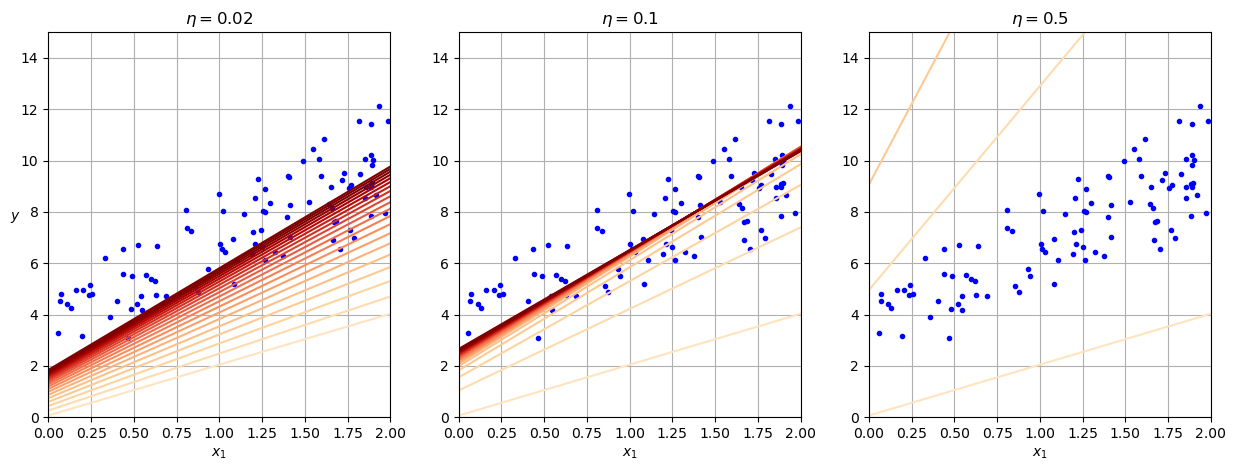

In [15]:
np.random.seed(rng_state)
theta = np.random.randn(2, 1)  # random initialization
plt.figure(figsize=(15, 5))
plt.subplot(131)
plot_gradient_descent(theta, eta=0.02)
plt.ylabel('$y$', rotation=0)
plt.subplot(132)
theta_path_bgd = plot_gradient_descent(theta, eta=0.1)  # store the theta_path returned from plot_gradient_descent() in theta_path_bgd
plt.subplot(133)
plot_gradient_descent(theta, eta=0.5)
plt.show()

## 2.2. Stochastic Gradient Descent

SGD picks a random instance in the training set at every step and computes the gradients based only on that single instance
- Faster: very little data to manipulate at every iteration
- Scalable for huge training set: only one instance needs to be in memory at each iteration

#### Stochastic:
- Less regular than BGD: instead of gently decreasing until it reaches the minimum, SGD bounces up and down
- SGD ends up very close to the minimum over time, but continues to bounce around, never settling down
- Once the algorithm stops, the final parameter values will be good, but not optimal.
- Randomness is good to escape from local optima, but bad because its never settles at the minimum

#### Simulated annealing:
- Gradually reduce the learning rate
- The steps start out large (which makes quick progress and escape local minima), then decrease gradually, allowing the algorithm to settle at the global minimum

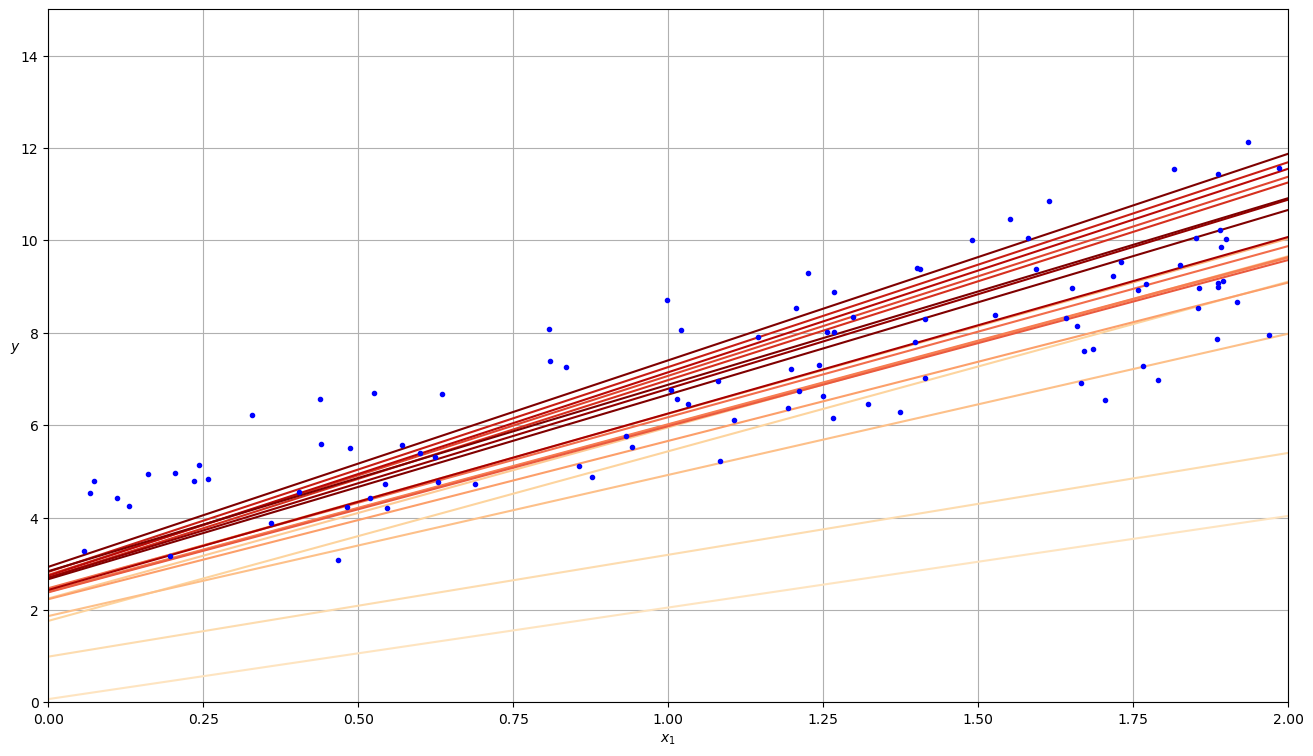

In [16]:
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
  return t0 / (t + t1)

np.random.seed(rng_state)
theta = np.random.randn(2, 1)  # random initialization

n_shown = 20
plt.figure(figsize=(16, 9))

theta_path_sgd = []
for epoch in range(n_epochs):
  for iteration in range(m):
    if epoch == 0 and iteration < n_shown:
      y_predict = X_new_b @ theta
      color = mpl.colors.rgb2hex(plt.cm.OrRd(iteration / n_shown + 0.15))
      plt.plot(X_new, y_predict, color=color)
    random_index = np.random.randint(m)
    xi = X_b[random_index : random_index + 1]
    yi = y[random_index : random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)  # for SGD, do not divide by m
    eta = learning_schedule(epoch * m + iteration)
    theta = theta - eta * gradients
    theta_path_sgd.append(theta)

plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([0, 2, 0, 15])
plt.grid()

In [17]:
theta

array([[3.79480469],
       [3.00496516]])

Linear regression using SGD in Scikit-Learn with `SGDRegressor` class, defaults to optimizing the MSE cost function

The code below:
- Runs for maximum 1,000 epochs (`max_iter`) or until the loss drops by less than $10^{–5}$ (`tol`) during 100 epochs (`n_iter_no_change`)
- Starts with a learning rate of 0.01 (`eta0`) using the default learning schedule (different from above)
- Lastly, it does not use any regularization (`penalty=None`; more details on this in below sections)

In [18]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01, n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())  # y.ravel() because fit() expects 1D targets

SGDRegressor(n_iter_no_change=100, penalty=None, random_state=42, tol=1e-05)

The result is quite close to the one returned by the Normal equation:

In [19]:
sgd_reg.intercept_, sgd_reg.coef_

(array([3.77246893]), array([3.01510338]))

#### Tip

- All Scikit-Learn estimators can be trained using the `fit()` method, but some estimators also have a `partial_fit()` method that you can call to run a single round of training on one or more instances (it ignores hyperparameters like `max_iter` or `tol`).
- Repeatedly calling `partial_fit()` will gradually train the model. This is useful when you need more control over the training process.
- Other models have a warm_start hyperparameter instead (and some have both): if you set `warm_start=True`, calling the `fit()` method on a trained model will not reset the model; it will just continue training where it left off, respecting hyperparameters like `max_iter` and `tol`. Note that `fit()` resets the iteration counter used by the learning schedule, while `partial_fit()` does not.

## 2.3. Mini-Batch Gradient Descent

Mini-batch GD computes the gradients on small random sets of instances called mini-batches
- **Data Split**: The training data is divided into smaller batches, or mini-batches
- **Model Update**: For each mini-batch, the algorithm computes the gradient of the loss function with respect to the model parameters and updates the parameters accordingly
- **Iteration**: This process repeats for multiple epochs until the model converges
- **Advantage**: Mini-batch GD converges faster than batch GD by updating parameters more frequently, but is more stable and tends to have less variance than SGD
- **Disadvantage**: It may be harder for Mini-batch GD to escape from local minima

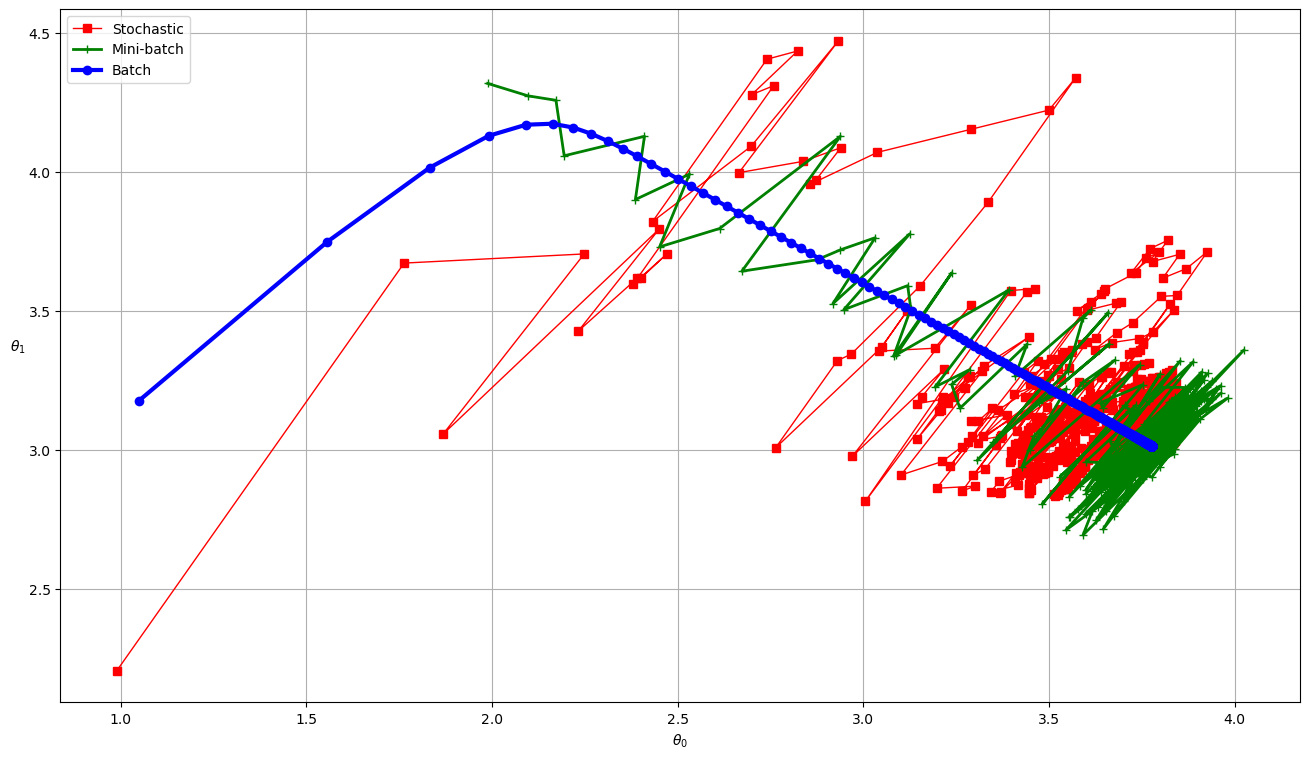

In [20]:
from math import ceil

n_epochs = 50
minibatch_size = 20
n_batches_per_epoch = ceil(m / minibatch_size)

np.random.seed(rng_state)
theta = np.random.randn(2, 1)  # random initialization

t0, t1 = 200, 1000  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

theta_path_mgd = []
for epoch in range(n_epochs):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for iteration in range(0, n_batches_per_epoch):
        idx = iteration * minibatch_size
        xi = X_b_shuffled[idx : idx + minibatch_size]
        yi = y_shuffled[idx : idx + minibatch_size]
        gradients = 2 / minibatch_size * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(iteration)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(16, 9))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], 'r-s', linewidth=1,
         label='Stochastic')
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], 'g-+', linewidth=2,
         label='Mini-batch')
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], 'b-o', linewidth=3,
         label='Batch')
plt.legend(loc='upper left')
plt.xlabel(r'$\theta_0$')
plt.ylabel(r'$\theta_1$   ', rotation=0)

plt.grid()

# 3. Polynomial Regression

Generating some data points for $y = 0.5X^2 + X + 2$

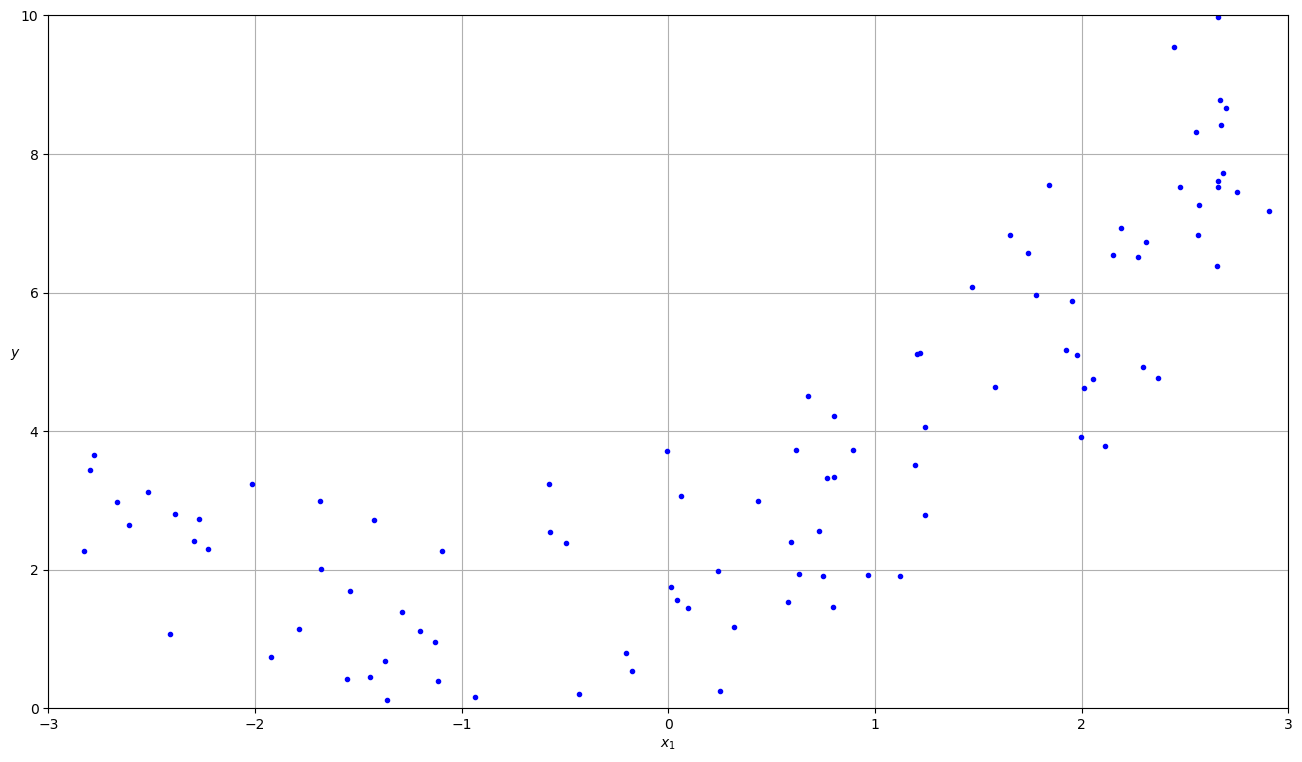

In [21]:
np.random.seed(rng_state)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
plt.figure(figsize=(16, 9))
plt.plot(X, y, 'b.')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

`PolynomialFeatures` is used to create new features by raising the existing features to different powers

For a single feature $X$, `PolynomialFeatures` can create $X$, $X^2$, $X^3$, etc

In [22]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0], X[1], X[2], X[3], X[4])

[1.12129838] [0.03970739] [0.80256439] [-1.44153226] [0.72740865]


Original feature: $[X]$ (as above)

Transformed features: $[X X^2]$

In [23]:
print(X_poly[0], X_poly[1], X_poly[2], X_poly[3], X_poly[4])

[1.12129838 1.25731005] [0.03970739 0.00157668] [0.80256439 0.64410959] [-1.44153226  2.07801527] [0.72740865 0.52912334]


`LinearRegression` fits a linear model to the transformed polynomial features

The linear model has coefficients for each polynomial term, which allows it to capture non-linear relationships in the original data

The transformation from `PolynomialFeatures` "tricks" LinearRegression into fitting a polynomial curve by creating a higher-dimensional feature space

So, while the underlying model remains linear, the transformed feature space enables it to fit polynomial relationships.

In [24]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.7214861]), array([[0.99660982, 0.52207633]]))

The estimated model from `LinearRegression` is $y = 0.491X^2 + 1.01X + 2.056$, which is close to the $y = 0.5X^2 + X + 2$ with gaussian noise

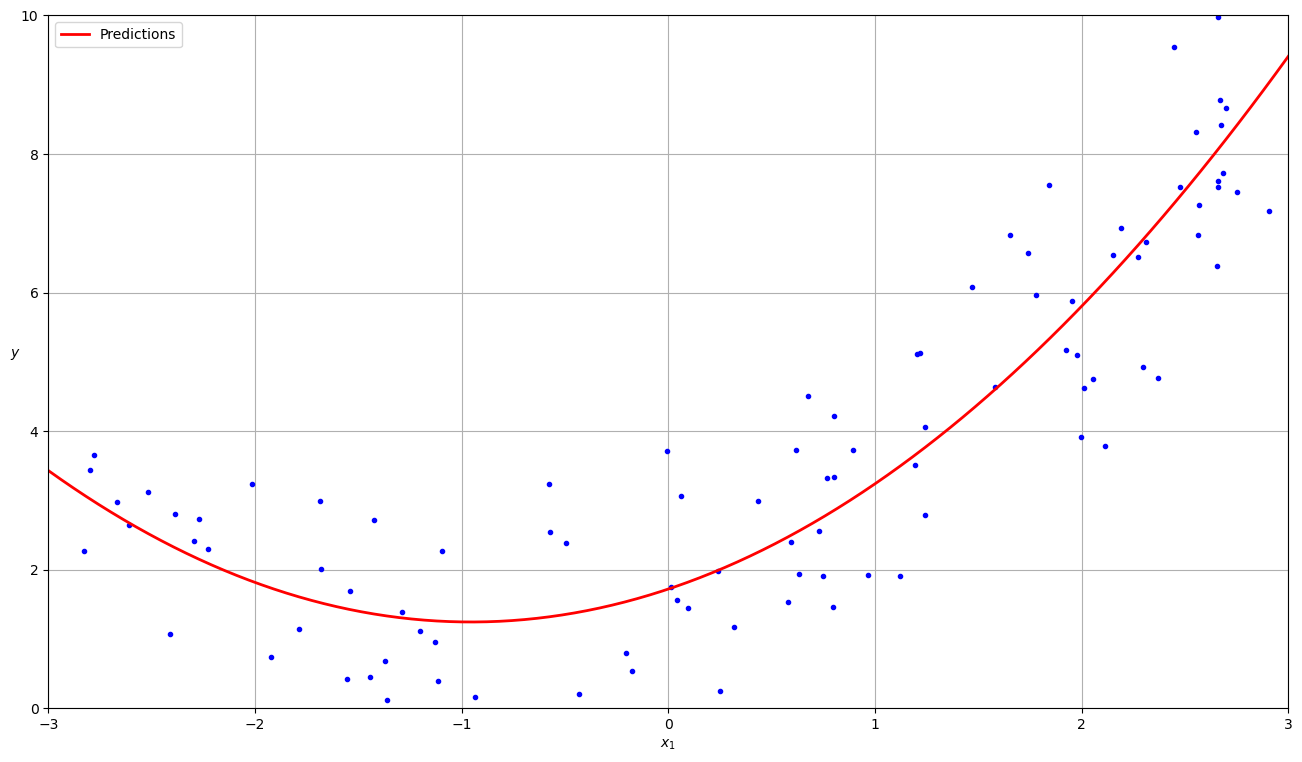

In [25]:
X_new = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.figure(figsize=(16, 9))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_new, 'r-', linewidth=2, label='Predictions')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.legend(loc='upper left')
plt.axis([-3, 3, 0, 10])
plt.grid()

#### Degrees and over fitting

`PolynomialFeatures` and `LinearRegression` work to best-fit the line to the data points according to the number of degrees specified

While a degree 1 (linear) line clearly can't fit the data, increasing the degree too high to 20 or 40 would end up with over fitting lines

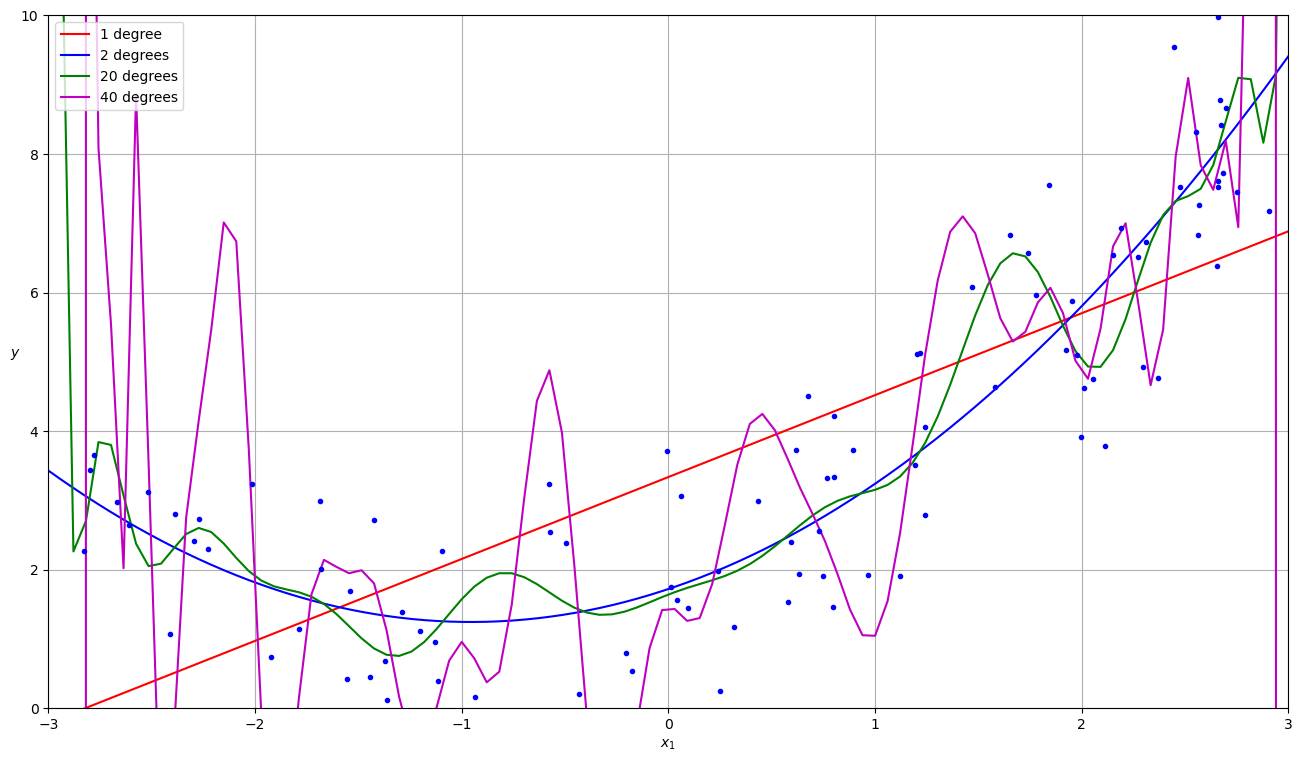

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

plt.figure(figsize=(16, 9))

for style, degree in (('r-', 1), ('b-', 2), ('g-', 20), ('m-', 40)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = make_pipeline(polybig_features, std_scaler, lin_reg)
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    label = f'{degree} degree{'s' if degree > 1 else ''}'
    plt.plot(X_new, y_newbig, style, label=label)

plt.plot(X, y, 'b.', linewidth=3)
plt.legend(loc='upper left')
plt.xlabel('$x_1$')
plt.ylabel('$y$', rotation=0)
plt.axis([-3, 3, 0, 10])
plt.grid()

# 4. Learning Curves

# 5. Regularized Linear Models

## 5.1. Ridge Regression

## 5.2. Lasso Regression

## 5.3. Elastic Net Regression

## 5.4. Early Stopping

# 6. Logistic Regression

## 6.1. Estimating Probabilities

## 6.2. Training and Cost Function

## 6.3. Decision Boundaries

## 6.4. Softmax Regression